In [1]:
import os
os.chdir("..")

In [2]:
from core.nn.LSTMmodel import LSTM
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import pickle
import datetime
import seaborn as sns
import covsirphy as cs
sns.set()
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
COUNTRY      = 'Greece'
DEVICE       = 'cpu'
TRAIN_UP_TO  = pd.to_datetime('2020-10-01')
ThreshConf   = 68
ThreshDead   = 20
target       = "New Confirmed"
FUTURE_DAYS  = 45

In [16]:
lstm = LSTM(COUNTRY, TRAIN_UP_TO, FUTURE_DAYS, ThreshDead, target)

In [17]:
df = lstm.init_data()

Init LSTM model for Greece, trained up to 2020-10-01 00:00:00, with a Confirmed Cases threshold of 64  and window size of 10
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:08<?, ?it/s, Loss =0.114, Lr=0.05]

 50%|#####     | 1/2 [00:08<00:08,  8.75s/it, Loss =0.114, Lr=0.05]

 50%|#####     | 1/2 [00:17<00:08,  8.75s/it, Loss =0.0239, Lr=0.05]

100%|##########| 2/2 [00:17<00:00,  8.88s/it, Loss =0.0239, Lr=0.05]

100%|##########| 2/2 [00:17<00:00,  8.96s/it, Loss =0.0239, Lr=0.05]


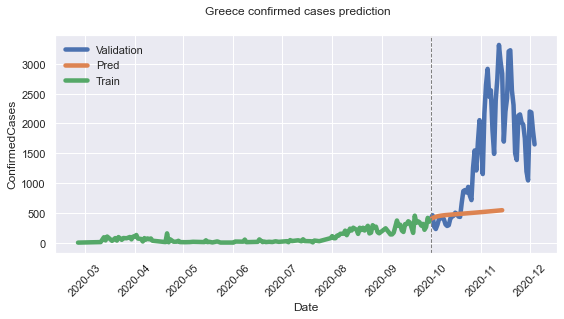

RMSLE : 0.41822                                       
 (not normalized)                                     
Init LSTM model for Greece, trained up to 2020-10-01 00:00:00, with a Confirmed Cases threshold of 88  and window size of 10
 10%|█         | 1/10 [00:21<03:15, 21.75s/trial, best loss: 0.4182184934616089]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:08<?, ?it/s, Loss =0.315, Lr=0.05]

 50%|#####     | 1/2 [00:08<00:08,  8.27s/it, Loss =0.315, Lr=0.05]

 50%|#####     | 1/2 [00:17<00:08,  8.27s/it, Loss =0.0493, Lr=0.05]

100%|##########| 2/2 [00:17<00:00,  8.43s/it, Loss =0.0493, Lr=0.05]

100%|##########| 2/2 [00:17<00:00,  8.53s/it, Loss =0.0493, Lr=0.05]


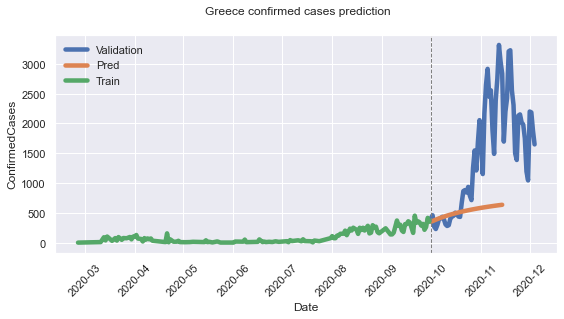

RMSLE : 0.40784                                                                 
 (not normalized)                                                               
Init LSTM model for Greece, trained up to 2020-10-01 00:00:00, with a Confirmed Cases threshold of 86  and window size of 10
 20%|██        | 2/10 [00:43<02:53, 21.75s/trial, best loss: 0.4078425168991089]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:09<?, ?it/s, Loss =0.13, Lr=0.05]

 50%|#####     | 1/2 [00:09<00:09,  9.52s/it, Loss =0.13, Lr=0.05]

 50%|#####     | 1/2 [00:19<00:09,  9.52s/it, Loss =0.0223, Lr=0.05]

100%|##########| 2/2 [00:19<00:00,  9.65s/it, Loss =0.0223, Lr=0.05]

100%|##########| 2/2 [00:19<00:00,  9.73s/it, Loss =0.0223, Lr=0.05]


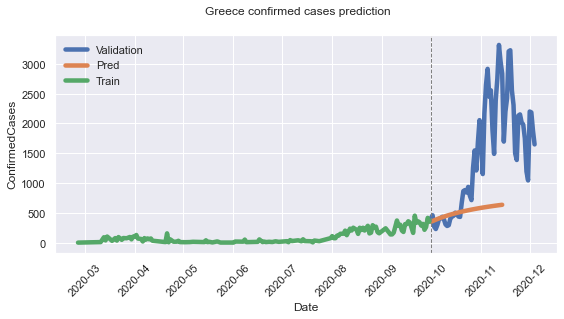

RMSLE : 0.45253                                                                 
 (not normalized)                                                               
Init LSTM model for Greece, trained up to 2020-10-01 00:00:00, with a Confirmed Cases threshold of 101  and window size of 10
 30%|███       | 3/10 [01:06<02:35, 22.22s/trial, best loss: 0.4078425168991089]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:08<?, ?it/s, Loss =0.669, Lr=0.05]

 50%|#####     | 1/2 [00:08<00:08,  8.71s/it, Loss =0.669, Lr=0.05]

 50%|#####     | 1/2 [00:16<00:08,  8.71s/it, Loss =0.0237, Lr=0.05]

100%|##########| 2/2 [00:16<00:00,  8.56s/it, Loss =0.0237, Lr=0.05]

100%|##########| 2/2 [00:16<00:00,  8.47s/it, Loss =0.0237, Lr=0.05]


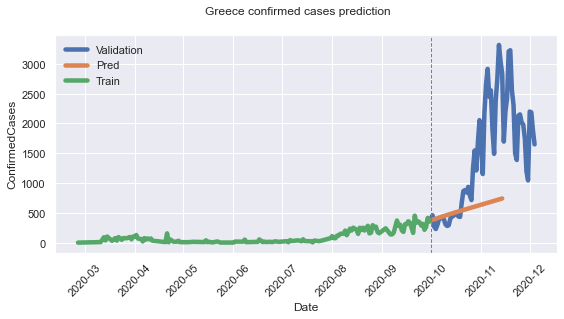

RMSLE : 0.39348                                                                 
 (not normalized)                                                               
Init LSTM model for Greece, trained up to 2020-10-01 00:00:00, with a Confirmed Cases threshold of 91  and window size of 10
 40%|████      | 4/10 [01:27<02:11, 21.88s/trial, best loss: 0.39347535371780396]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:02<?, ?it/s]


 40%|████      | 4/10 [01:33<02:19, 23.26s/trial, best loss: 0.39347535371780396]


KeyboardInterrupt: 

In [23]:
lstm.iterations = 2
best = lstm.optimizeTreshold()
lstm.iterations = 15

In [ ]:
ThreshConf   = best["Threshold"]
lstm.simulate(ThreshConf = ThreshConf)

In [ ]:
from core.SIR import SIR

In [ ]:
sir_sim = SIR(COUNTRY, TRAIN_UP_TO)

In [ ]:
snl = sir_sim.init_data()

In [ ]:
summary = snl.summary()
summary["Start_dt"] = pd.to_datetime(summary["Start"], format="%d%b%Y")
summary["End_dt"] = pd.to_datetime(summary["End"], format="%d%b%Y")
query = summary[summary["End_dt"] > TRAIN_UP_TO]
all_phases = query.index.tolist()

snl.combine(phases=all_phases)
target_date = datetime.datetime.strftime(TRAIN_UP_TO - datetime.timedelta(days=1), format="%d%b%Y")
snl.separate(target_date)

In [ ]:
summary = snl.summary()

In [ ]:
summary = snl.summary()
all_phases = summary.index.tolist()
snl.disable(phases=all_phases[:-1])
snl.enable(phases=all_phases[-1:])
snl.summary()

In [ ]:
snl.estimate(model=cs.SIRF)

In [ ]:
df = snl.simulate();
df["New Confirmed"] = df["Confirmed"].diff()

In [ ]:
lstm.plot(SIRdata=df)

In [ ]:
accuracy, dfOverTime = lstm.accuracy(SIRdata=df)
cm = sns.color_palette("coolwarm", as_cmap=True)
accuracy.style.background_gradient(cmap = cm, vmin=np.min(accuracy.values), vmax=np.max(accuracy.values))

In [ ]:
dfOverTime.plot(title="Error over time. Lower values indicate higher accuracy.", xlabel="Days", ylabel="RMSE");